This is the updated dataset of excluded providers who commits frauds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2=pd.read_csv("./datasets/UPDATED.csv")

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df2.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,20200319,0,0,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN


# EDA

In [4]:
# Combining first name and last name

df2["Name"]=df2["FIRSTNAME"]+" "+df2["LASTNAME"]

In [5]:
# dropping out the null values

df=df2[["Name","CITY","ZIP"]].dropna()

Making a new column which shows the provider is fraud as 1

In [6]:
df["is_fraud"]=1

In [7]:
df

,Name,CITY,ZIP,is_fraud
3153,NANCY AALDERS,OAK LAWN,60453,1
3154,NICKOLAS AALTONEN,SPOKANE,99201,1
3155,MUHAMMAD AAMIR,BLOOMFIELD HILLS,48302,1
3156,ALINA AARON,PHOENIX,85018,1
3157,CHRISTOPHER AARON,WEST NEWTON,15089,1
...,...,...,...,...
73699,RUSSELL ZWOLINSKI,CHICAGO,60618,1
73700,MARY ZYDERVELD,RUCKERSVILLE,22962,1
73701,CHRISTEENA ZYLSTRA,KANSAS CITY,64118,1
73702,JAMES ZYLSTRA,ST CLOUD,56304,1


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.to_csv("./datasets/fraud_name.csv")

Let's see the cities which have high medicare fraud 

In [10]:
df2["CITY"]

0            BROOKLYN
1           SMITHTOWN
2               MIAMI
3               BRONX
4            BROOKLYN
             ...     
73699         CHICAGO
73700    RUCKERSVILLE
73701     KANSAS CITY
73702        ST CLOUD
73703       LANCASTER
Name: CITY, Length: 73704, dtype: object

In [11]:
x=df2.groupby("CITY")["NPI"].count()

In [12]:
x=x.reset_index()

In [13]:
x

,CITY,NPI
0,129010 MOSCOW RUSSIA,1
1,"1410 WATERLOO, BELGI",1
2,ABBEVILLE,11
3,ABBOTT PARK,1
4,ABERDEEN,39
...,...,...
9822,ZION,3
9823,ZIONSVILLE,1
9824,ZIRCONIA,1
9825,ZOLFO SPRINGS,2


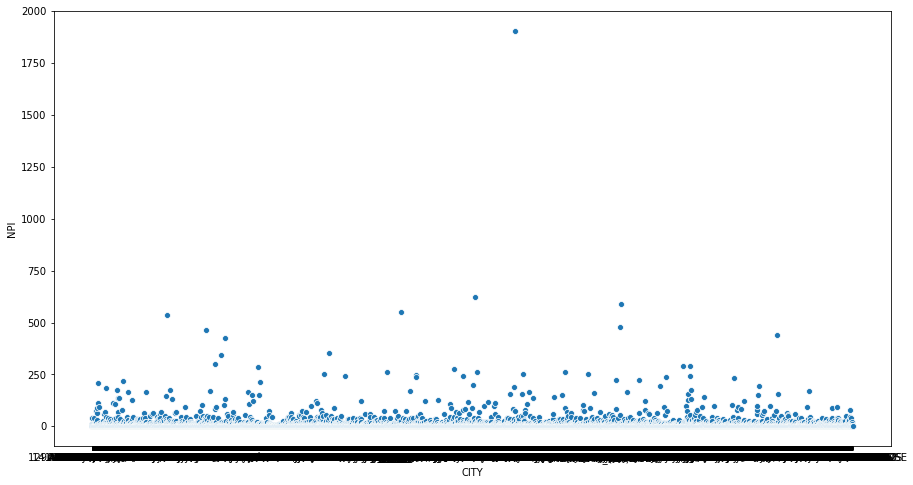

In [14]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=x["CITY"], 
                y=x["NPI"]
            , palette="rainbow_r");

There is only one outlier over here.Except that all state has stable fraudulent.

In [15]:
x.describe()

,NPI
count,9827.000000
mean,7.500051
std,30.890233
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1905.000000


In [16]:
x[x["NPI"]==1905]

,CITY,NPI
5470,MIAMI,1905


So MIAMI has the highest number of fraud provider

As we only need unique information to detect the fraud Name is not unique so I will continue with NPI numbers to detect the fraud

In [17]:
npi=df2[["NPI","EXCLTYPE"]]
npi

,NPI,EXCLTYPE
0,0,1128a1
1,0,1128a1
2,0,1128b7
3,1922348218,1128a1
4,0,1128b5
...,...,...
73699,0,1128b4
73700,0,1128b4
73701,0,1128b4
73702,0,1128a2


In [18]:
npi.rename(columns = {"EXCLTYPE":'is_fraud'}, inplace = True)

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [19]:
npi.loc[npi["NPI"] != 0, "is_fraud"] = 1
npi.loc[npi["NPI"] == 0, "is_fraud"] = 0

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
npi["is_fraud"].value_counts()

0    68116
1     5588
Name: is_fraud, dtype: int64

In [21]:
fraud=npi[npi["is_fraud"]==1]

In [22]:
fraud

,NPI,is_fraud
3,1922348218,1
23,1942476080,1
27,1275600959,1
30,1891731758,1
58,1851631543,1
...,...,...
73661,1124024435,1
73668,1194930149,1
73678,1578637385,1
73683,1558366815,1


In [23]:
fraud["NPI"].nunique()

5476

In [24]:
fraud.to_csv("./datasets/fraud.csv")